In [65]:
import numpy as np 

import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [66]:
dts=pd.read_csv("/content/diabetes.csv")

In [67]:
dts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [68]:
dts.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


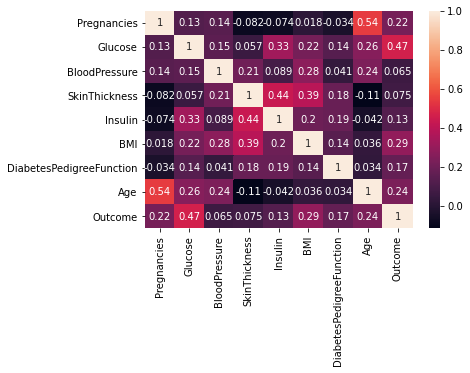

In [69]:
at = sns.heatmap(dts.corr(), annot=True)

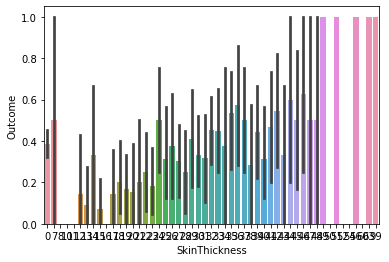

In [10]:
sns.barplot(x='SkinThickness',y='Outcome',data=dts)

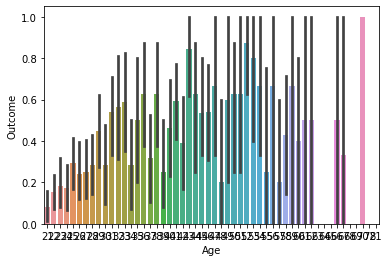

In [12]:
sns.barplot(x='Age',y='Outcome',data=dts)


AxesSubplot(0.125,0.125;0.62x0.755)


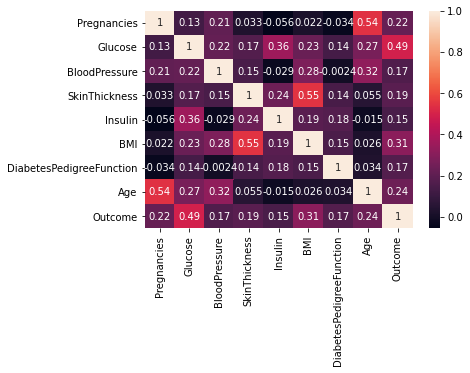

In [105]:
dts['Insulin']=dts['Insulin'].replace(0, dts['Insulin'].median())
dts['SkinThickness']=dts['SkinThickness'].replace(0, dts['SkinThickness'].median())
dts['BloodPressure']=dts['BloodPressure'].replace(0, dts['BloodPressure'].median())
dts['Glucose']=dts['Glucose'].replace(0, dts['Glucose'].median())
dts['BMI']=dts['BMI'].replace(0.0, dts['BMI'].median())
print(sns.heatmap(dts.corr(),annot=True))
from sklearn.model_selection import train_test_split

X=dts.drop(columns=['Outcome'])
Y=dts['Outcome']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [106]:
model1=LogisticRegression()

In [107]:
model1.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
model1.score(X_test,Y_test)*100


78.78787878787878

In [109]:
model2 = KNeighborsClassifier()

model2.fit(X_train,Y_train)
model2.score(X_test,Y_test)*100

70.56277056277057

In [110]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)
decision_tree.score(X_test,Y_test)*100


69.26406926406926

In [119]:
model3=LogisticRegression()
model3.fit(X_train,Y_train)
model3.score(X_test,Y_test)*100

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


78.78787878787878

In [113]:
print(dts.head(20))

print("total number of rows : {0}".format(len(dts)))
print("number of rows missing Glucose: {0}".format(len(dts.loc[dts['Glucose'] == 0])))
print("number of rows missing BP: {0}".format(len(dts.loc[dts['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(dts.loc[dts['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(dts.loc[dts['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(dts.loc[dts['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(dts.loc[dts['Age'] == 0])))


    Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0             6      148             72  ...                     0.627   50        1
1             1       85             66  ...                     0.351   31        0
2             8      183             64  ...                     0.672   32        1
3             1       89             66  ...                     0.167   21        0
4             0      137             40  ...                     2.288   33        1
5             5      116             74  ...                     0.201   30        0
6             3       78             50  ...                     0.248   26        1
7            10      115             72  ...                     0.134   29        0
8             2      197             70  ...                     0.158   53        1
9             8      125             96  ...                     0.232   54        1
10            4      110             92  ...                     